# Logistic 回归——Rental Listing Inquiries
纽约市公寓用户感兴趣程度预测

Rental Listing Inquiries数据集是Kaggle平台上的一个分类竞赛任务，需要根据公寓的特征来预测其受欢迎程度（用户感兴趣程度分为高、中、低三类）。其中房屋的特征x共有14维，响应值y为用户对该公寓的感兴趣程度。评价标准为logloss。

竞赛链接：https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries

由于房屋属性类型各异，对原有属性进行特征工程请见FE_RentListingInqueries.ipynb
这里直接读取编码后的数据

In [77]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

from matplotlib import pyplot

## 读取数据 
**<font color=red> 数据探索和特征工程部分共10分，大家酌情给分</font>**<br>

In [78]:
# 读取数据
# path to where the data lies
#dpath = './data/'
train = pd.read_csv("RentListingInquries_FE_train.csv")
train.head()

,bathrooms,bedrooms,latitude,longitude,price,price_bathrooms,price_bedrooms,room_diff,room_num,Year,...,walk,walls,war,washer,water,wheelchair,wifi,windows,work,interest_level
0,1.5,3,40.7145,-73.9425,3000,1200.0,750.000000,-1.5,4.5,2016,...,0,0,0,0,0,0,0,0,0,1
1,1.0,2,40.7947,-73.9667,5465,2732.5,1821.666667,-1.0,3.0,2016,...,0,0,0,0,0,0,0,0,0,2
2,1.0,1,40.7388,-74.0018,2850,1425.0,1425.000000,0.0,2.0,2016,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,40.7539,-73.9677,3275,1637.5,1637.500000,0.0,2.0,2016,...,0,0,0,0,0,0,0,0,0,2
4,1.0,4,40.8241,-73.9493,3350,1675.0,670.000000,-3.0,5.0,2016,...,0,0,1,0,0,0,0,0,0,2


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Columns: 225 entries, bathrooms to interest_level
dtypes: float64(7), int64(218)
memory usage: 84.7 MB


In [80]:
test = pd.read_csv("RentListingInquries_FE_test.csv")
test.head()

,listing_id,bathrooms,bedrooms,latitude,longitude,price,price_bathrooms,price_bedrooms,room_diff,room_num,...,virtual,walk,walls,war,washer,water,wheelchair,wifi,windows,work
0,7142618,1.0,1,40.7185,-73.9865,2950,1475.000000,1475.000000,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,7210040,1.0,2,40.7278,-74.0000,2850,1425.000000,950.000000,-1.0,3.0,...,0,0,0,1,0,0,0,0,0,0
2,7103890,1.0,1,40.7306,-73.9890,3758,1879.000000,1879.000000,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,7143442,1.0,2,40.7109,-73.9571,3300,1650.000000,1100.000000,-1.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,6860601,2.0,2,40.7650,-73.9845,4900,1633.333333,1633.333333,0.0,4.0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74659 entries, 0 to 74658
Columns: 225 entries, listing_id to work
dtypes: float64(7), int64(218)
memory usage: 128.2 MB


## 准备数据

In [82]:
# 将类别字符串变成数字
# drop ids and get labels
y_train = train['interest_level']   
X_train = train.drop(["interest_level"], axis=1)

In [83]:
test_Id = test['listing_id']
X_test = test.drop(["listing_id"], axis=1)

## 数据预处理

In [84]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)


## 模型训练

### default Logistic Regression


In [16]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [17]:
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.cross_validation import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print 'logloss of each fold is: ',-loss
print'cv logloss is:', -loss.mean()

/Users/qing/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/qing/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


logloss of each fold is:  [ 0.68941773  0.68562716  0.68059667  0.67057311  0.68217322]
cv logloss is: 0.68167757706


### 正则化的 Logistic Regression及参数调优
这部分用交叉验证GridSearchCV、LogisticRegressionCV和下面的train_test_split任意一种方式均可
本部分30分，大家可以酌情给分

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 
目标函数为：J = C* sum(logloss(f(xi), yi)) +  penalty 

在sklearn框架下，不同学习器的参数调整步骤相同：
设置候选参数集合
调用GridSearchCV
调用fit

In [9]:
# 训练样本6w+，交叉验证太慢，用train_test_split估计模型性能
from sklearn.model_selection import train_test_split
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, train_size = 0.33,random_state = 0)

/Users/qing/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
from sklearn.linear_model import LogisticRegression
def fit_grid_point_LR(penalty, C, X_train, y_train, X_val, y_val):
    
    # 在训练集训练LR
    LR = LogisticRegression(penalty=penalty, C=C)
    LR.fit(X_train, y_train)
    
    # 在训练集和校验集上测试
    y_train_pred = LR.predict_proba(X_train)
    y_val_pred = LR.predict_proba(X_val)
    logloss_val = log_loss(y_val,y_val_pred)
    logloss_train = log_loss(y_train, y_train_pred)
    
    print("logloss on test: %f and on train: %f with C = %f and penalty = %s"%(logloss_val, logloss_train, C, penalty) )
    return logloss_val

In [11]:
#需要调优的参数
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

logloss_s = []
for i, OneC in enumerate(Cs):
    for j, onePenalty in enumerate(penaltys):
        tmp = fit_grid_point_LR(onePenalty, OneC, X_train_part, y_train_part, X_val, y_val)
        logloss_s.append(tmp)

logloss on test: 0.810481 and on train: 0.810799 with C = 0.001000 and penalty = l1
logloss on test: 0.774072 and on train: 0.766717 with C = 0.001000 and penalty = l2
logloss on test: 0.734006 and on train: 0.732657 with C = 0.010000 and penalty = l1
logloss on test: 0.727626 and on train: 0.706260 with C = 0.010000 and penalty = l2


/Users/qing/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


logloss on test: 0.688883 and on train: 0.670371 with C = 0.100000 and penalty = l1
logloss on test: 0.718411 and on train: 0.675056 with C = 0.100000 and penalty = l2
logloss on test: 0.711218 and on train: 0.656478 with C = 1.000000 and penalty = l1
logloss on test: 0.734154 and on train: 0.654930 with C = 1.000000 and penalty = l2
logloss on test: 0.749583 and on train: 0.653949 with C = 10.000000 and penalty = l1
logloss on test: 0.758307 and on train: 0.649837 with C = 10.000000 and penalty = l2
logloss on test: 0.768046 and on train: 0.653492 with C = 100.000000 and penalty = l1
logloss on test: 0.774022 and on train: 0.648738 with C = 100.000000 and penalty = l2
logloss on test: 0.771397 and on train: 0.653574 with C = 1000.000000 and penalty = l1
logloss on test: 0.782042 and on train: 0.648750 with C = 1000.000000 and penalty = l2


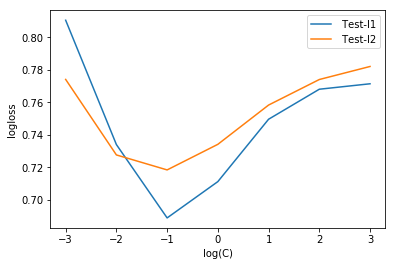

In [22]:
logloss_s1 =np.array(logloss_s).reshape(len(Cs),len(penaltys))
x_axis = np.log10(Cs)
for j, onePenalty in enumerate(penaltys):
    pyplot.plot(x_axis, np.array(logloss_s1[:,j]), label = ' Test-' + onePenalty)

pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'logloss' )

pyplot.show()

#### 用最佳参数在全体训练数据上训练模型

In [85]:
bestCs = logloss_s1.argmin(axis = 0)

best_logloss = logloss_s1[bestCs[0],0]
best_penalty_index = 0
best_penalty = penaltys[best_penalty_index]

for j, onePenalty in enumerate(penaltys):
    if logloss_s1[bestCs[j],j] < best_logloss:
        best_logloss = logloss_s1[bestCs[j],j]
        best_penalty_index = j
        best_penalty = penaltys[best_penalty_index]

bestC = Cs[bestCs[best_penalty_index]]

print("best C: %f \n best penalty: %s"%(bestC, best_penalty) )
    
LR = LogisticRegression(penalty=best_penalty, C=bestC)
LR.fit(X_train, y_train)

best C: 0.100000 
 best penalty: l1


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 若计算资源允许，可用下面的GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)

/Users/qing/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [ ]:
# view the complete results (list of named tuples)
grid.cv_results_

In [14]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.671833302852
{'penalty': 'l2', 'C': 100}


如果最佳值在候选参数的边缘，最好再尝试更大的候选参数或更小的候选参数，直到找到拐点。
l2, c=100

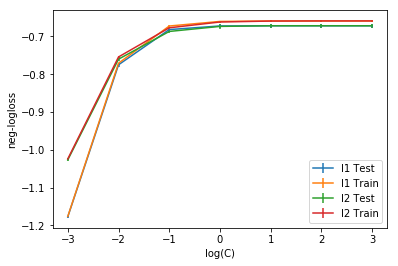

In [74]:
#pd.DataFrame(grid.cv_results_).to_csv('LogisticGridSearchCV_Otto.csv')
#cvresult = pd.DataFrame.from_csv('LogisticGridSearchCV_Otto.csv')
#test_means = cv_results['mean_test_score']
#test_stds = cv_results['std_test_score'] 
#train_means = cvresult['mean_train_score']
#train_stds = cvresult['std_train_score'] 


# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'neg-logloss' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

上图给出了L1正则和L2正则下、不同正则参数C对应的模型在训练集上测试集上的正确率（score）。可以看出在训练集上C越大（正则越少）的模型性能越好；但在测试集上当C=100时性能最好（L1正则和L2正则均是）

## 生成提交测试结果


In [86]:
y_test_pred = LR.predict_proba(X_test)
out_df1 = pd.DataFrame(y_test_pred)
out_df1.columns = ["high", "medium", "low"]

out_df = pd.concat([test_Id,out_df1], axis = 1)
out_df.to_csv("LR_Rent.csv", index=False)